In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [24]:
# resizing all the images
IMAGE_SIZE = (100,100)
path = '/content/drive/MyDrive/New_Data_CoV2'
data = []
c = 0

In [25]:
for folder in os.listdir(path):
    sub_path=path+"/"+folder
    for folder2 in os.listdir(sub_path):
      sub_path2=sub_path+"/"+folder2
      for img in os.listdir(sub_path2):
        image_path=sub_path2+"/"+img
        img_arr=cv2.imread(image_path)

        try:
          img_arr=cv2.resize(img_arr,IMAGE_SIZE)
          data.append(img_arr)
        except Exception as E:
          c+=1
          data.append(np.array())
          print('path of images skipped: ', image_path)
          continue


print("Number of images skipped= ",c)

Number of images skipped=  0


In [26]:
# converting the data list consisting of arrays into an array
X = np.array(data)

In [27]:
# shape of X
X.shape

(4171, 100, 100, 3)

In [28]:
# normalizing the input
x = X/255

In [29]:
# using datagen to agument the existing input data to make the prediction labels
datagen = ImageDataGenerator(rescale = 1/255)
dataset = datagen.flow_from_directory(path,
                                    target_size = IMAGE_SIZE,
                                    batch_size = 32,
                                    class_mode = 'sparse')

Found 4171 images belonging to 3 classes.


In [30]:
# classes of predict labels
dataset.class_indices

{'Covid': 0, 'Healthy': 1, 'Others': 2}

In [31]:
y = dataset.classes

In [32]:
y.shape

(4171,)

In [33]:
len(y)

4171

In [34]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [35]:
# splitting the data into train, validation, test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [36]:
x_train.shape, y_train.shape

((3002, 100, 100, 3), (3002,))

In [37]:
x_val.shape, y_val.shape

((751, 100, 100, 3), (751,))

In [38]:
x_test.shape, y_test.shape

((418, 100, 100, 3), (418,))

In [39]:
x_train[0].shape

(100, 100, 3)

In [40]:
from tensorflow._api.v2.nn import dropout
model = tf.keras.Sequential()

# convoltuion layer
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu, input_shape = x_train[0].shape))
# pooling layer
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.BatchNormalization())


# convolution layer
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu))
# pooling layer
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.BatchNormalization())

# convolution layer
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
# pooling layer
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.BatchNormalization())

# convolution layer
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
# pooling layer
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.BatchNormalization())

# input layer
model.add(tf.keras.layers.Flatten())


# output layer
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                      

In [41]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, start_from_epoch = 7, patience=5)

In [43]:
record = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[early_stop], shuffle=True)

Epoch 1/50
94/94 [==============================] - 15s 24ms/step - loss: 0.9177 - accuracy: 0.6256 - val_loss: 1.0644 - val_accuracy: 0.5326
Epoch 2/50
94/94 [==============================] - 1s 14ms/step - loss: 0.5775 - accuracy: 0.7605 - val_loss: 0.9243 - val_accuracy: 0.5366
Epoch 3/50
94/94 [==============================] - 1s 16ms/step - loss: 0.4401 - accuracy: 0.8318 - val_loss: 0.9492 - val_accuracy: 0.5340
Epoch 4/50
94/94 [==============================] - 1s 13ms/step - loss: 0.2909 - accuracy: 0.8967 - val_loss: 0.9519 - val_accuracy: 0.5379
Epoch 5/50
94/94 [==============================] - 1s 13ms/step - loss: 0.2018 - accuracy: 0.9384 - val_loss: 0.7000 - val_accuracy: 0.7017
Epoch 6/50
94/94 [==============================] - 1s 13ms/step - loss: 0.1092 - accuracy: 0.9753 - val_loss: 0.7189 - val_accuracy: 0.7004
Epoch 7/50
94/94 [==============================] - 1s 13ms/step - loss: 0.0637 - accuracy: 0.9903 - val_loss: 0.5710 - val_accuracy: 0.7710
Epoch 8/50
9

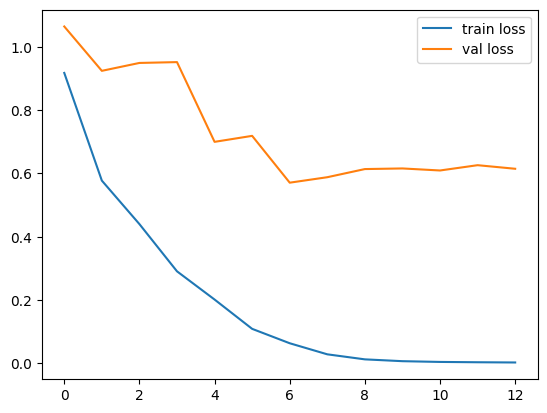

In [44]:
plt.plot(record.history['loss'], label = 'train loss')
plt.plot(record.history['val_loss'], label = 'val loss')
plt.legend()

plt.savefig('loss_graph.png')
plt.show()

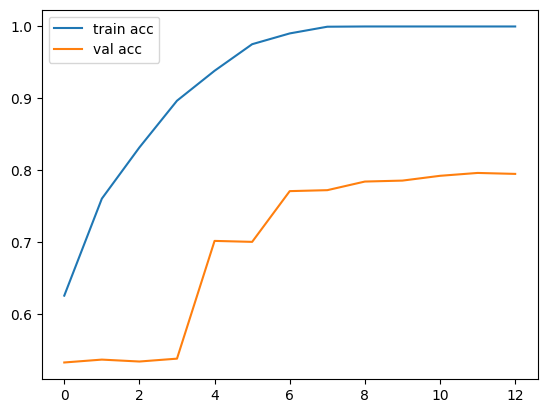

In [45]:
# accuracy over epochs
plt.plot(record.history['accuracy'], label = 'train acc')
plt.plot(record.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.savefig('acc-graph.png')
plt.show()

In [46]:
y_val_pred = model.predict(x_val)
y_val_pred = np.argmax(y_val_pred, axis=1)
print(classification_report(y_val_pred, y_val))

24/24 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       408
           1       0.53      0.65      0.58       122
           2       0.78      0.71      0.74       221

    accuracy                           0.79       751
   macro avg       0.74      0.75      0.74       751
weighted avg       0.81      0.79      0.80       751



In [47]:
confusion_matrix(y_val_pred, y_val)

array([[361,  30,  17],
       [ 16,  79,  27],
       [ 23,  41, 157]])

In [48]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)

14/14 [==============================] - 0s 17ms/step


In [49]:
accuracy_score(y_pred, y_test)

0.8325358851674641

In [50]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       223
           1       0.59      0.74      0.66        62
           2       0.82      0.80      0.81       133

    accuracy                           0.83       418
   macro avg       0.78      0.81      0.79       418
weighted avg       0.84      0.83      0.84       418



In [51]:
confusion_matrix(y_pred, y_test)

array([[195,  16,  12],
       [  5,  46,  11],
       [ 10,  16, 107]])

In [52]:
train_pred = model.predict(x_train)
train_pred = np.argmax(train_pred, axis=1)

94/94 [==============================] - 1s 10ms/step


In [53]:
accuracy_score(train_pred, y_train)

1.0

In [54]:
model.save('/content/drive/MyDrive/New_Data_CoV2/multi_class_model.h5')